In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings('ignore')
%matplotlib inline
#device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 모의 1: GAS MEAN TEMP 만 다루기 위한 데이터 전처리

### 예시 : 1월 데이터

In [2]:
# df = pd.read_csv('C:/Users/Sejong/Desktop/한화오션/모의csv파일/general_pivot_1.csv', encoding = 'cp949')
# df = df.drop([df.columns[i] for i in range(3,38,2)], axis = 1)
# df['kst'] = [df['kst'][i][11:] for i in range(0,88194)]
# df.rename(columns = {'癤풼s_date' : 'date'}, inplace = True)
# df_gas = df.iloc[:, :8] # gas temerature data frame
# df_gas_mean = pd.concat([df.iloc[:, :2], df.iloc[:,7]], axis = 1)
# df_gas_mean_new = {'date' : [],
#                    'kst' : [],
#                    'GAS MEAN TEMP' :[]}

# for i in range(0,len(df_gas_mean['date']),2): # 0, 2, 4,...
#     MEAN = (df_gas_mean['ME(S) CYL EXH GAS MEAN TEMP'][i] + df_gas_mean['ME(S) CYL EXH GAS MEAN TEMP'][i+1]) / 2
#     df_gas_mean_new['date'].append(df_gas_mean['date'][i])
#     df_gas_mean_new['kst'].append(df_gas_mean['kst'][i])
#     df_gas_mean_new['GAS MEAN TEMP'].append(MEAN)

# df_gas_mean_new = pd.DataFrame(df_gas_mean_new)
# df_gas_mean_new

# 데이터 생성

In [39]:
for idx in range(1,9): # 1월부터 8월까지
    df = pd.read_csv('./모의csv파일/general_pivot_{}.csv'.format(idx), encoding = 'cp949')
    df = pd.concat([df.iloc[:, :2], df.loc[:, 'ME(S) CYL EXH GAS MEAN TEMP']], axis = 1)
    df['kst'] = [df['kst'][i][11:] for i in range(0,len(df['kst']))]
    df.rename(columns = {'癤풼s_date' : 'date'}, inplace = True)
    globals()['df_' + str(idx)] = df
    
df_7['ME(S) CYL EXH GAS MEAN TEMP'][29891] = 270.682
df_7['ME(S) CYL EXH GAS MEAN TEMP'][27768:27772] = 293.813
df_7['ME(S) CYL EXH GAS MEAN TEMP'][27786] = 295.035
df_7['ME(S) CYL EXH GAS MEAN TEMP'][27796:27801] = 295.217
df_7['ME(S) CYL EXH GAS MEAN TEMP'][29832] = 270.82
df_7['ME(S) CYL EXH GAS MEAN TEMP'][df_7['ME(S) CYL EXH GAS MEAN TEMP'].isna()]

for idx in range(1,9):
    globals()['df_' + str(idx)].rename(columns = {'ME(S) CYL EXH GAS MEAN TEMP' : 'TEMP'}, inplace = True)
    globals()['df_' + str(idx)].to_csv('./temperature_csv_file/temp_df_{}.csv'.format(idx), index = False)

# 10/10

In [20]:
def univariate_data(dataset, start_index, end_index, history_size, target_size, sector):

    data = []
    labels = []

    start_index = start_index + history_size
    end_index = len(dataset) - target_size

    for i in range(start_index, end_index, 120): # 0
        indices = range(i - history_size, i) # [0 - 120] , [120 - 240] ...
        # Reshape data from (history_size,) to (history_size, 1)

        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(sector)
    
    return np.array(data), np.array(labels)

univariate_past_history = 120
univariate_future_target = 0

In [5]:
for i in range(1,9):
    globals()['df_'+str(i) ]= pd.read_csv('./temperature_csv_file/temp_df_{}.csv'.format(i), encoding = 'cp949')

In [6]:
df_all = pd.concat([df_1, df_2], axis = 0)
df_all = pd.concat([df_all, df_3], axis = 0)
df_all = pd.concat([df_all, df_4], axis = 0)
df_all = pd.concat([df_all, df_5], axis = 0)
df_all = pd.concat([df_all, df_6], axis = 0)
df_all = pd.concat([df_all, df_7], axis = 0)
df_all = pd.concat([df_all, df_8], axis = 0)

df_all

,date,kst,TEMP
0,20230101,9:00,286.797
1,20230101,9:00,287.082
2,20230101,9:01,285.938
3,20230101,9:01,285.772
4,20230101,9:02,286.357
...,...,...,...
1075,20230801,8:57,280.894
1076,20230801,8:58,280.625
1077,20230801,8:58,280.475
1078,20230801,8:59,280.545


In [7]:
# LEN = 601888
# share : 85984, remainder : 0
print(601892 // 7, 601892 % 7) # 4
print(85984 // 120, 85984 % 120) # 64 * 7 = 448 -> 452

print(601892 // 120, 601892 % 120) # 92
print(5015 // 7, 5015 % 7) # 120 * 3 = 360 -> 452

85984 4
716 64
5015 92
716 3


In [28]:
601892 // 6, 601892 % 6
100312 % 120

112

In [8]:
df_all = df_all[:7*85984]
# 7개의 구간으로 나눔
for i in range(1,8):
    globals()['df_'+str(i)+'_temp'] = df_all[85984*(i-1):85984*i].reset_index()


NameError: name 'globals_1' is not defined

In [9]:
for i in range(7):
    data = {'Group' : [], 'batch_num' : [], 'mean_temp' : []}

    for j in range(716):
        MEAN = np.mean(globals()['df_'+str(i+1)+'_temp']['TEMP'][120*j:120*(j+1)])
        data['Group'].append(i)
        data['batch_num'].append(j+1)
        data['mean_temp'].append(MEAN)

    globals()['group_'+str(i+1)] = pd.DataFrame(data)

for i in range(1,7):
    mean = globals()['group_'+str(i+1)]['mean_temp'].mean()
    diff  = 261.7292228119181 - mean
    globals()['group_'+str(i+1)]['mean_temp'] += diff

In [10]:
for i in range(7):
    data = globals()['group_'+str(i+1)]['mean_temp']
    print(np.mean(data), np.std(data))

261.7292228119181 61.700425369945144
261.7292228119181 102.58955443281776
261.7292228119181 66.16069648725342
261.7292228119181 85.71652264445112
261.7292228119181 37.45551465574259
261.7292228119181 93.49933893333099
261.729222811918 75.5967598914906


In [11]:
group_1

,Group,batch_num,mean_temp
0,0,1,284.192167
1,0,2,284.353050
2,0,3,285.275900
3,0,4,285.589075
4,0,5,285.146358
...,...,...,...
711,0,712,276.766900
712,0,713,276.213800
713,0,714,275.862250
714,0,715,275.961408


### 10/6

In [4]:
for i in range(1,9):
    globals()['df_'+str(i) ]= pd.read_csv('./temperature_csv_file/temp_df_{}.csv'.format(i), encoding = 'cp949')

df_all = pd.concat([df_1, df_2], axis = 0)
df_all = pd.concat([df_all, df_3], axis = 0)
df_all = pd.concat([df_all, df_4], axis = 0)
df_all = pd.concat([df_all, df_5], axis = 0)
df_all = pd.concat([df_all, df_6], axis = 0)
df_all = pd.concat([df_all, df_7], axis = 0)
df_all = pd.concat([df_all, df_8], axis = 0)

df_all = df_all[:7*85984]
# 7개의 구간으로 나눔
for i in range(1,8):
    globals()['df_'+str(i)+'_temp'] = df_all[85984*(i-1):85984*i].reset_index()

for i in range(7):
    data = {'Group' : [], 'batch_num' : [], 'mean_temp' : [], }

    for j in range(716):
        MEAN = np.mean(globals()['df_'+str(i+1)+'_temp']['TEMP'][120*j:120*(j+1)])
        data['Group'].append(i)
        data['batch_num'].append(j+1)
        data['mean_temp'].append(MEAN)

    globals()['group_'+str(i+1)] = pd.DataFrame(data)

for i in range(1,7):
    mean = globals()['group_'+str(i+1)]['mean_temp'].mean()
    diff  = 261.7292228119181 - mean
    globals()['group_'+str(i+1)]['mean_temp'] += diff

for i in range(7):
    data = globals()['group_'+str(i+1)]['mean_temp']
    print(np.mean(data), np.std(data))


# def linear_function_new(data,N,sector,day): 
#     """
#     data : np.array gas temperature data
#     N : 몇개의 구간으로 나눌 것인지
#     sector : 몇번째 구간의 data인지
#     idx : 특정 구간에서 몇 번째 데이터인지
#     """
    
#     dx = (600 - 261.729) / (N+1) # 전체 데이터에 대한 증가율 : 56.3785
#     dx_day = dx / 716 # 각 섹터에 대한 증가율 : 
    
#     return data + dx_day * day + sector  * dx - 28

# N = 5
# for sector in range(1,7):
#     for j in range(716):
#         data = globals()['group_'+str(sector+1)]['mean_temp'][j]
#         globals()['group_'+str(sector+1)]['mean_temp'][j] = linear_function_new(data, N, sector, j)

# TIME = pd.DataFrame({'TIME' : np.arange(5012)})
# tmp = pd.concat([group_1, group_2], axis = 0)
# tmp = pd.concat([tmp, group_3], axis = 0)
# tmp = pd.concat([tmp, group_4], axis = 0)
# tmp = pd.concat([tmp, group_5], axis = 0)
# tmp = pd.concat([tmp, group_6], axis = 0)
# tmp = pd.concat([tmp, group_7], axis = 0)
# tmp = tmp.reset_index()
# tmp = pd.concat([tmp, TIME], axis = 1)
# tmp.drop(columns = 'index', inplace = True)
# df = tmp

261.7292228119181 61.700425369945144
261.7292228119181 102.58955443281776
261.7292228119181 66.16069648725342
261.7292228119181 85.71652264445112
261.7292228119181 37.45551465574259
261.7292228119181 93.49933893333099
261.729222811918 75.5967598914906


Group          6.000000
batch_num    358.500000
mean_temp    261.729223
dtype: float64

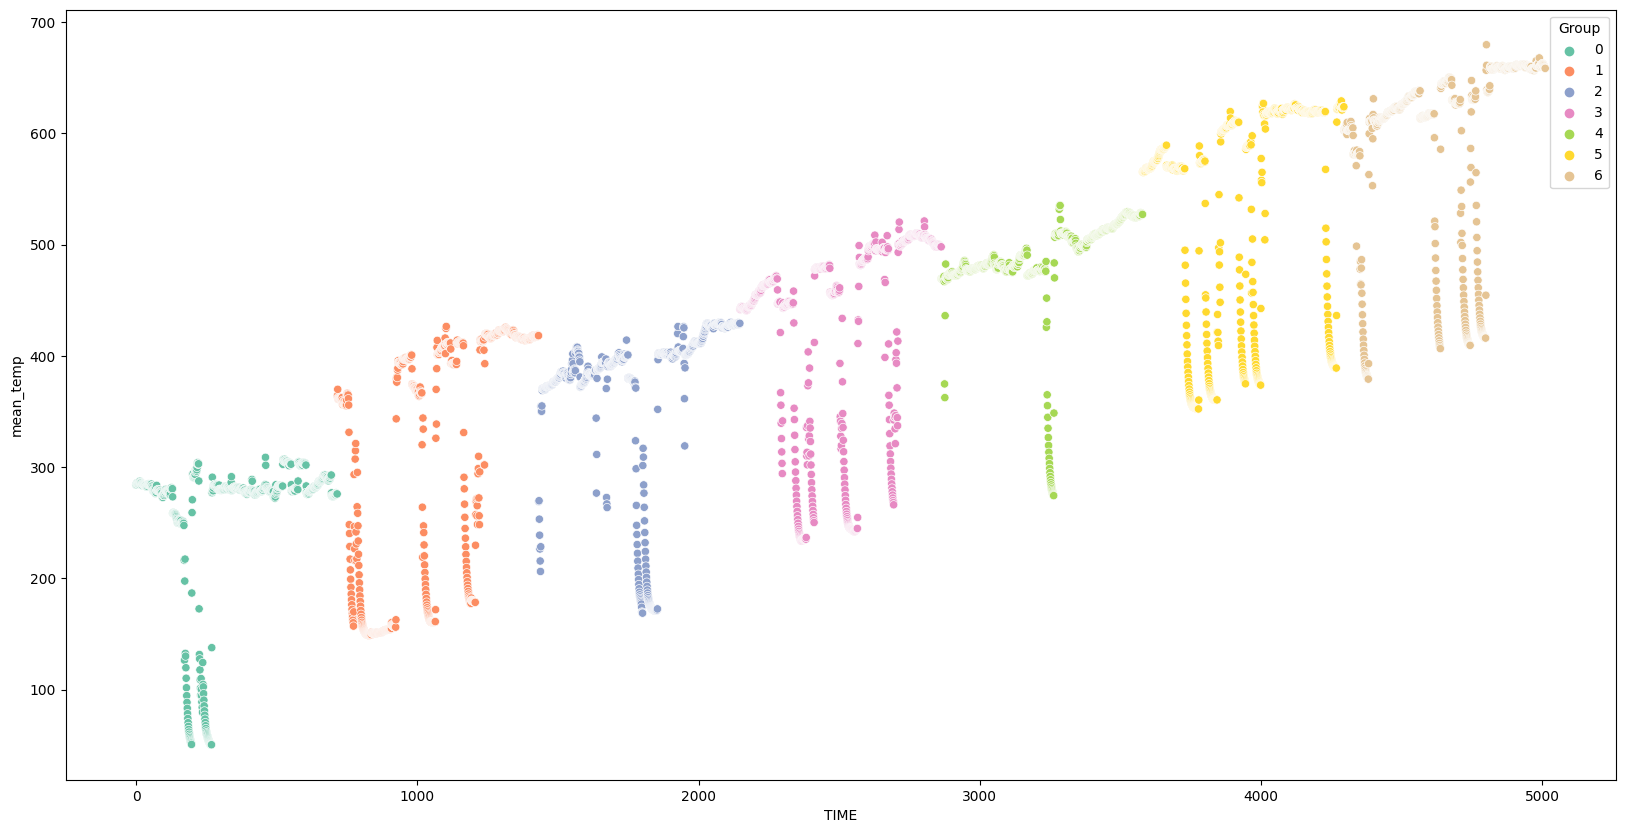

In [119]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'TIME', y = 'mean_temp', data = df, hue='Group', palette='Set2')
plt.show()

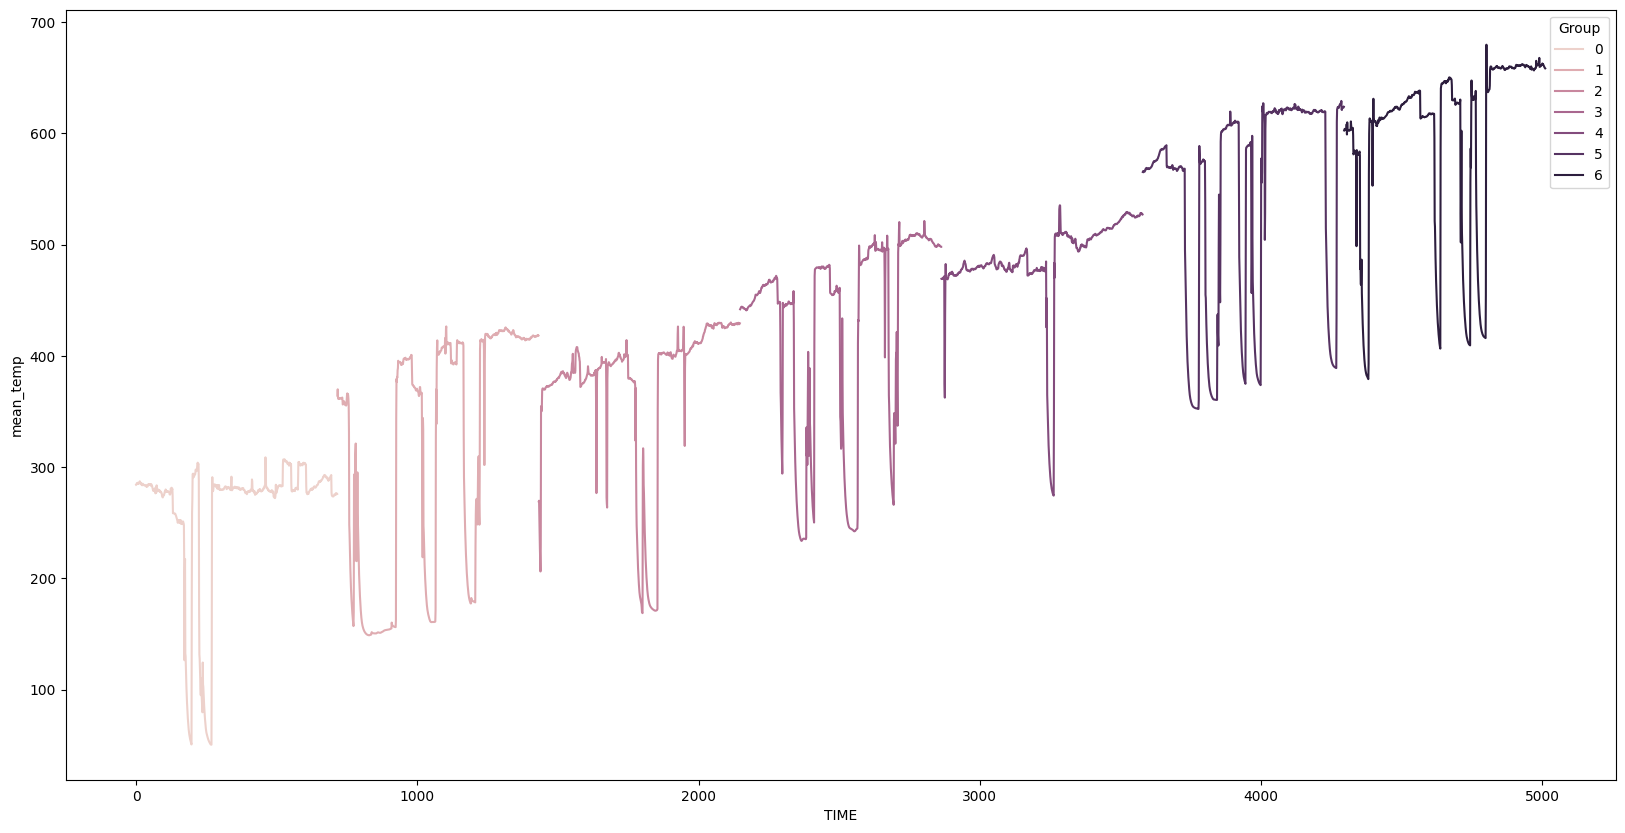

In [118]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'TIME', y = 'mean_temp', data = df , hue='Group')
plt.show()

In [40]:
df.index = df.TIME
df = df.drop(columns = ['TIME','Group', 'batch_num'])
df

,mean_temp
TIME,
0,284.192167
1,284.353050
2,285.275900
3,285.589075
4,285.146358
...,...
5007,659.975503
5008,659.416252
5009,659.112351


In [106]:
group_1['mean_temp'].mean()

261.7292228119181

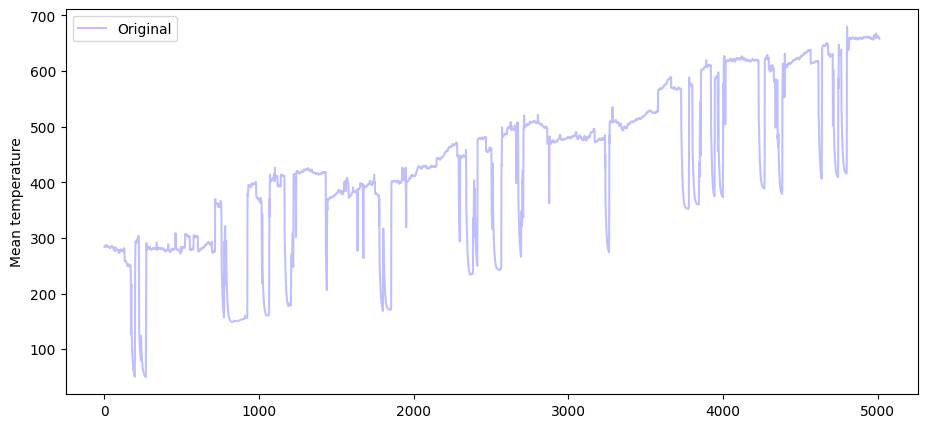

In [43]:

def plot_ts(data, color, alpha, label):
    
    plt.figure(figsize=(11,5))
    sns.lineplot(data = data, x ='TIME', y = 'mean_temp', hue='')
    plt.plot(data, color=color, alpha=alpha, label=label, )
    plt.ylabel('Mean temperature')
    plt.legend()
    plt.show()

plot_ts(df, 'blue', 0.25, 'Original')

In [45]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(df, autolag='AIC'))

def ADF_test(data):
	# ADF 실시
    results = adfuller(data, autolag='AIC')
    
    # 통계량
    s = results[0]
    # p-value
    p = results[1]
    # 기각역
    cv = results[4]
    
    # 출력
    print('-'*30)
    print('Augemented Dickey-Fuller Test')
    print('H0 : 단위근이 존재한다 (비정상 시계열)')
    print('Ha : 단위근이 없다 (정상 시계열)')
    print('Critical Values : {}'.format(cv))
    print('-'*30)
    print('Test Statistics : {:.4f}'.format(s))
    print('p-value : {:.4f}'.format(p))
    print('-'*30)

ADF_test(df)

(-4.663821907444632, 9.835595550293494e-05, 6, 5005, {'1%': -3.4316572241792462, '5%': -2.862117651858631, '10%': -2.567077484762989}, 40737.563523454955)
------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.4316572241792462, '5%': -2.862117651858631, '10%': -2.567077484762989}
------------------------------
Test Statistics : -4.6638
p-value : 0.0001
------------------------------


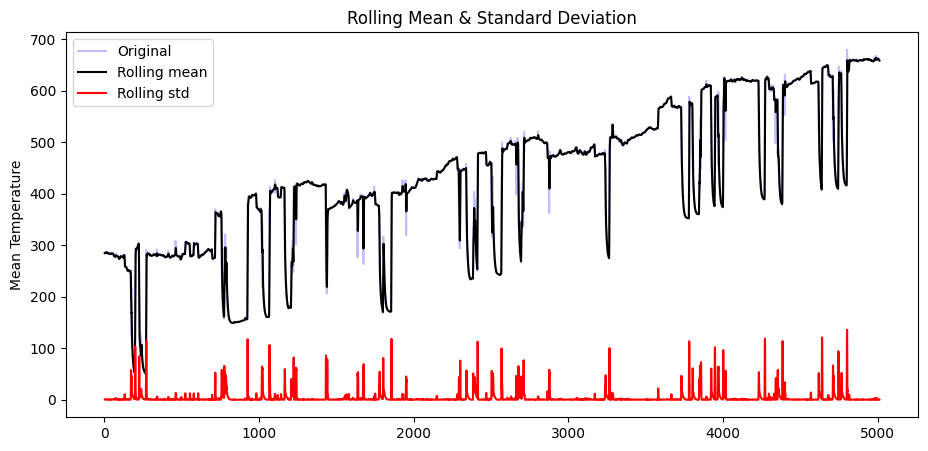

In [93]:
def plot_rolling(data, roll_size):
    # 이동평균함수(rolling) - 평균, 표준편차
    roll_mean = data.rolling(window=roll_size).mean()
    roll_std = data.rolling(window=roll_size).std()
    
    # 시각화
    plt.figure(figsize=(11,5))
    plt.plot(data, color='blue', alpha=0.25, label='Original')
    plt.plot(roll_mean, color='black', label='Rolling mean')
    plt.plot(roll_std, color='red', label='Rolling std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylabel("Mean Temperature")
    plt.legend()
    plt.show()

# 함수 실행
plot_rolling(df, 4)

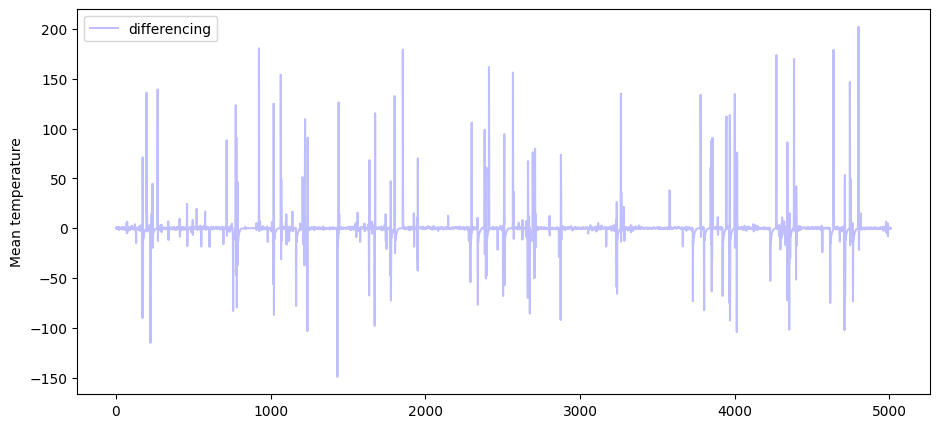

In [47]:
df_diff = df - df.shift()
plot_ts(df_diff, color='blue', alpha=0.25, label='differencing')

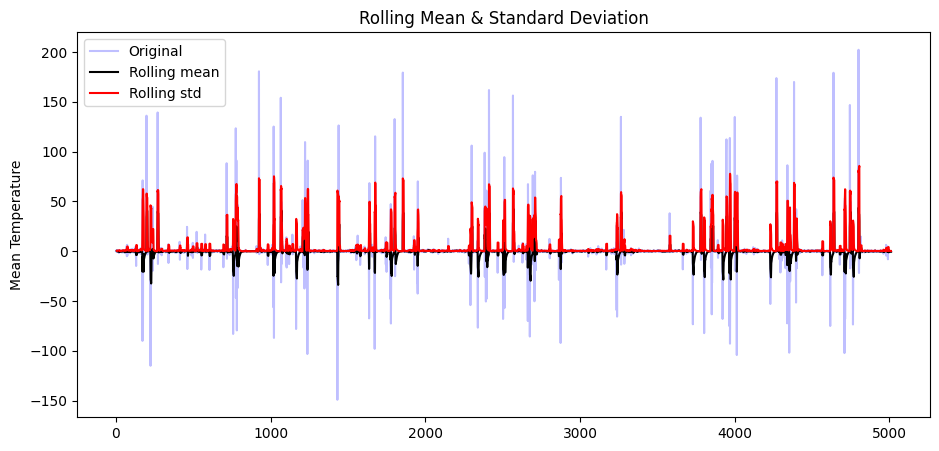

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.4316624715142177, '5%': -2.862119970102166, '10%': -2.5670787188546584}
------------------------------
Test Statistics : -16.4363
p-value : 0.0000
------------------------------


In [48]:
plot_rolling(df_diff, 6)
ADF_test(df_diff.dropna())

In [50]:
# 차분
df_diff2 = df.diff().dropna()

# ADF 테스트
ADF_test(df_diff2)

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.4316624715142177, '5%': -2.862119970102166, '10%': -2.5670787188546584}
------------------------------
Test Statistics : -16.4363
p-value : 0.0000
------------------------------


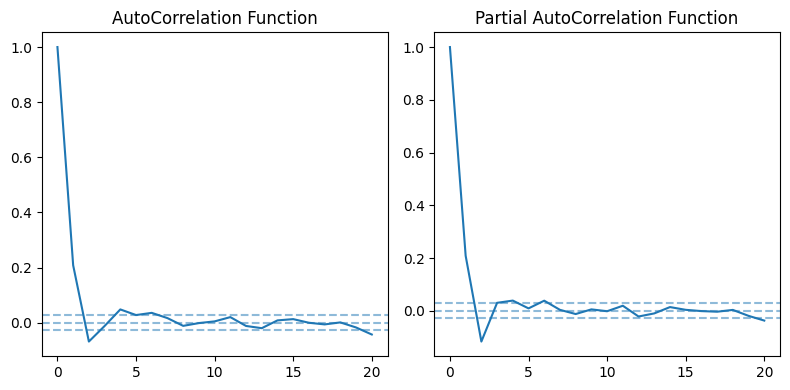

In [51]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf

# ACF
acf_20 = acf(x=df_diff2, nlags=20)
# PACF
pacf_20 = pacf(x=df_diff2, nlags=20, method='ols')

# 95% 신뢰구간 계산하기
confidence = 1.96/np.sqrt(len(df_diff2))

# 시각화
plt.figure(figsize=(8,4))
# ACF
plt.subplot(1,2,1)
plt.plot(acf_20)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('AutoCorrelation Function')
# PACF
plt.subplot(1,2,2)
plt.plot(pacf_20)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('Partial AutoCorrelation Function')

plt.tight_layout()

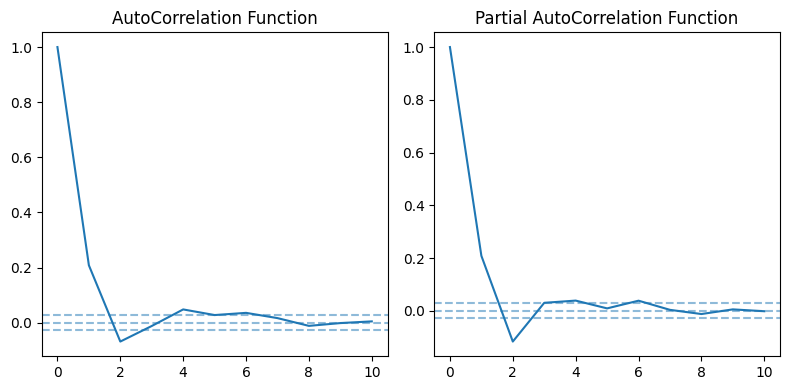

In [54]:
# ACF
acf_10 = acf(x=df_diff2, nlags=10)
# PACF
pacf_10 = pacf(x=df_diff2, nlags=10, method='ols')

# 95% 신뢰구간
confidence = 1.96/np.sqrt(len(df_diff2))

# 시각화
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(acf_10)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('AutoCorrelation Function')

plt.subplot(1,2,2)
plt.plot(pacf_10)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('Partial AutoCorrelation Function')

plt.tight_layout()

In [80]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA

# index를 period로 변환해주어야 warning이 뜨지 않음
df_copy = df.copy()


# 예측을 시작할 위치(이후 차분을 적용하기 때문에 맞추어주었음
start_idx = df_copy.index[1]

# ARIMA(1,0,1)
model1 = ARIMA(df_copy, order=(1,0,1))
# fit model
model1_fit = model1.fit()

# 전체에 대한 예측 실시
forecast1 = model1_fit.predict(start = start_idx)

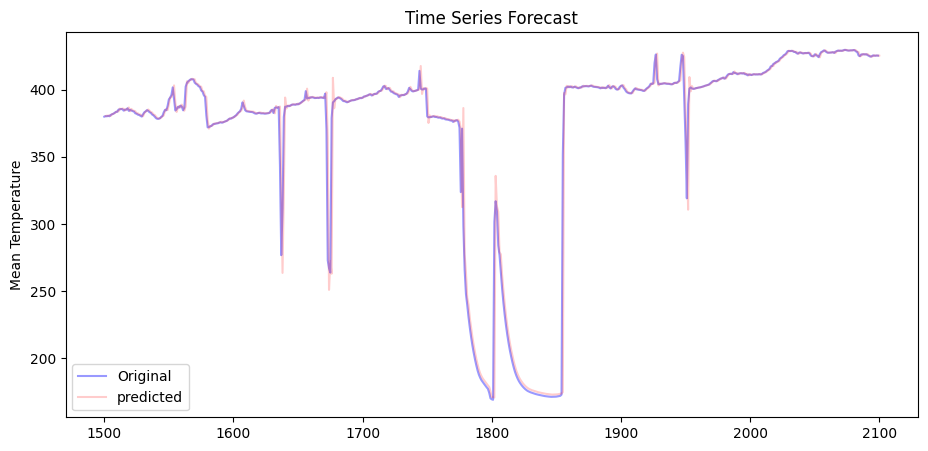

Mean Squared Error : 11.9942


In [104]:
from sklearn.metrics import mean_squared_error

def plot_and_error(data, forecast):
    # MSE 계산
    mse = mean_squared_error(data, forecast)
    # 시각화
    plt.figure(figsize=(11,5))
    plt.plot(data, color='blue', alpha=0.4 , label='Original')
    plt.plot(forecast, color='red', label='predicted', alpha = 0.2)
    plt.title("Time Series Forecast")
    plt.ylabel("Mean Temperature")
    plt.legend()
    plt.show()
    # MSE 출력
    print('Mean Squared Error : {:.4f}'.format(mse))

plot_and_error(df[1500:2100], forecast1[1500:2100])

c:\Users\Sejong\Desktop\hanhwa\hanhwa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


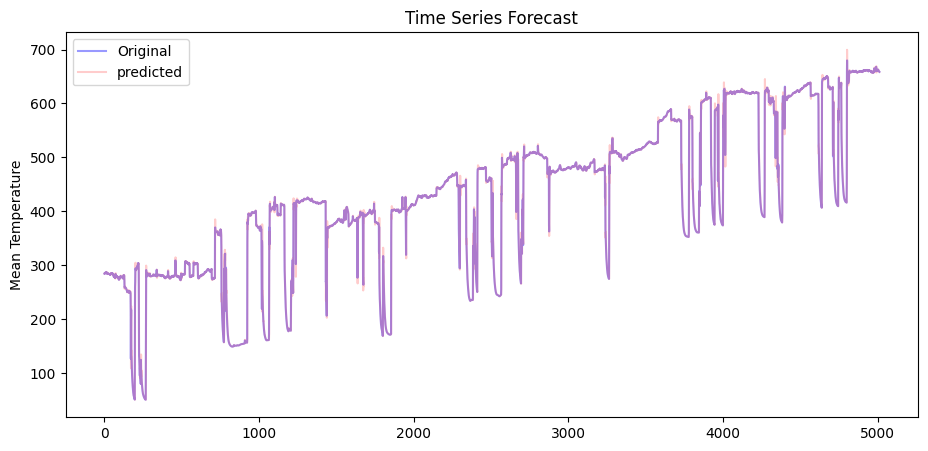

Mean Squared Error : 208.1588


In [100]:
# 모델 파라미터 최적화 (p=6, d=1, q=3)
model2 = ARIMA(df_copy, order=(6,1,3))
# fit
model2_fit = model2.fit()
# 예측
forecast2 = model2_fit.predict(start=start_idx)
# 시각화 및 MSE 연산
plot_and_error(df[1:], forecast2)

In [111]:
group_7.mean()

Group          6.000000
batch_num    358.500000
mean_temp    600.150102
dtype: float64

######################################################################## 10/10 끝

In [217]:
for i in range(7):
    data = {'Group' : [], 'batch_num' : [], 'mean_temp' : []}

    for j in range(716):
        MEAN = np.mean(globals()['df_'+str(i+1)+'_temp']['TEMP'][120*j:120*(j+1)])
        data['Group'].append(i)
        data['batch_num'].append(j+1)
        data['mean_temp'].append(MEAN)

    globals()['group_'+str(i+1)] = pd.DataFrame(data)

for i in range(1,7):
    mean = globals()['group_'+str(i+1)]['mean_temp'].mean()
    diff  = 261.7292228119181 - mean
    globals()['group_'+str(i+1)]['mean_temp'] += diff

In [218]:
for i in range(7):
    data = globals()['group_'+str(i+1)]['mean_temp']
    print(np.mean(data), np.std(data))

261.7292228119181 61.700425369945144
261.7292228119181 102.58955443281776
261.7292228119181 66.16069648725342
261.7292228119181 85.71652264445112
261.7292228119181 37.45551465574259
261.7292228119181 93.49933893333099
261.729222811918 75.5967598914906


In [219]:
(600-261.729) / 6

56.3785

In [220]:
def linear_function_new(data,N,sector,day): 
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    idx : 특정 구간에서 몇 번째 데이터인지
    """
    
    dx = (600 - 261.729) / (N+1) # 전체 데이터에 대한 증가율 : 56.3785
    dx_day = dx / 716 # 각 섹터에 대한 증가율 : 
    
    return data + dx_day * day + sector  * dx - 28

In [221]:
N = 5

for sector in range(1,7):
    for j in range(716):
        data = globals()['group_'+str(sector+1)]['mean_temp'][j]
        globals()['group_'+str(sector+1)]['mean_temp'][j] = linear_function_new(data, N, sector, j)

In [248]:
TIME = pd.DataFrame({'TIME' : np.arange(5012)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = 'index', inplace = True)
tmp

,Group,batch_num,mean_temp,TIME
0,0,1,284.192167,0
1,0,2,284.353050,1
2,0,3,285.275900,2
3,0,4,285.589075,3
4,0,5,285.146358,4
...,...,...,...,...
5007,6,712,659.975503,5007
5008,6,713,659.416252,5008
5009,6,714,659.112351,5009
5010,6,715,658.698967,5010


#########################################

# 9/26

In [4]:
for idx in range(1,9): # 1월부터 8월까지
    df = pd.read_csv('./모의csv파일/general_pivot_{}.csv'.format(idx), encoding = 'cp949')
    df = pd.concat([df.iloc[:, :2], df.loc[:, 'ME(S) CYL EXH GAS MEAN TEMP']], axis = 1)
    df['kst'] = [df['kst'][i][11:] for i in range(0,len(df['kst']))]
    df.rename(columns = {'癤풼s_date' : 'date'}, inplace = True)
    globals()['df_' + str(idx)] = df


In [10]:
df_7['ME(S) CYL EXH GAS MEAN TEMP'][29891] = 270.682
df_7['ME(S) CYL EXH GAS MEAN TEMP'][27768:27772] = 293.813
df_7['ME(S) CYL EXH GAS MEAN TEMP'][27786] = 295.035
df_7['ME(S) CYL EXH GAS MEAN TEMP'][27796:27801] = 295.217
df_7['ME(S) CYL EXH GAS MEAN TEMP'][29832] = 270.82
df_7['ME(S) CYL EXH GAS MEAN TEMP'][df_7['ME(S) CYL EXH GAS MEAN TEMP'].isna()]


Series([], Name: ME(S) CYL EXH GAS MEAN TEMP, dtype: float64)

In [8]:
df_all = pd.concat([df_1, df_2], axis = 0)
df_all = pd.concat([df_all, df_3], axis = 0)
df_all = pd.concat([df_all, df_4], axis = 0)
df_all = pd.concat([df_all, df_5], axis = 0)
df_all = pd.concat([df_all, df_6], axis = 0)
df_all = pd.concat([df_all, df_7], axis = 0)
df_all = pd.concat([df_all, df_8], axis = 0)
df_all

,date,kst,ME(S) CYL EXH GAS MEAN TEMP
0,20230101,9:00,286.797
1,20230101,9:00,287.082
2,20230101,9:01,285.938
3,20230101,9:01,285.772
4,20230101,9:02,286.357
...,...,...,...
1075,20230801,8:57,280.894
1076,20230801,8:58,280.625
1077,20230801,8:58,280.475
1078,20230801,8:59,280.545


In [132]:
X_train.rename(columns = {'ME(S) CYL EXH GAS MEAN TEMP' : 'TEMP'}, inplace = True)
indices = range(0,120)
X_train_array = np.array(X_train['TEMP'])
X_train_array.shape

(541702,)

In [149]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):

    data = []
    labels = []

    start_index = start_index + history_size
    end_index = len(dataset) - target_size

    for i in range(start_index, end_index, 120): # 0
        indices = range(i - history_size, i) # [0 - 120] , [120 - 240] ...
        # Reshape data from (history_size,) to (history_size, 1)

        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(0)
    
    data.append(np.reshape(dataset[end_index - 120:end_index], (120,1)))
    labels.append(0)
    return np.array(data), np.array(labels)

univariate_past_history = 120
univariate_future_target = 0

X_train_data, y_train_data = univariate_data(X_train_array, 0, 541702 ,
                                           univariate_past_history,
                                           univariate_future_target)
# x_val_uni, y_val_uni = univariate_data(X_test['ME(S) CYL EXH GAS MEAN TEMP'], 0 , 60190,
#                                        univariate_past_history,
#                                        univariate_future_target)

In [151]:
print(X_train_data.shape, y_train_data.shape)

(4515, 120, 1) (4515,)


In [160]:
X_train_data.mean()

242.28623414174976

In [154]:
def linear_function_1H(data,N,sector,day, hour): # y = ax + 240
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    idx : 특정 구간에서 몇 번째 데이터인지
    """
    # calculate gradient (a)
    dx = 360 / (N+1) # 전체 데이터에 대한 증가율 : 51.4
    dx_day = dx / 30 # 각 섹터에 대한 증가율 : 1.73
    dx_hour = dx_day / 24 # 각 시간에 대한 증가율 : 0.072
    return data + dx * sector + dx_day * day + dx_hour * hour

################################################################################경계선

#### 동일한 시간의 평균값을 구하는 코드

In [3]:
for idx in range(1,9): # 1월부터 8월까지
    df = pd.read_csv('./모의csv파일/general_pivot_{}.csv'.format(idx), encoding = 'cp949')
    df = df.drop([df.columns[i] for i in range(3,38,2)], axis = 1)
    df['kst'] = [df['kst'][i][11:] for i in range(0,len(df['kst']))]
    df.rename(columns = {'癤풼s_date' : 'date'}, inplace = True)
    df_gas = df.iloc[:, :8] # gas temerature data frame
    df_gas_mean = pd.concat([df.iloc[:, :2], df.iloc[:,7]], axis = 1)
    globals()['df_gas_mean_new_' + str(idx)] = {'date' : [],
                    'kst' : [],
                    'GAS MEAN TEMP' :[]}
    
    # 새로운 DataFrame 만들기
    for i in range(0,len(df_gas_mean['date']),2): # 0, 2, 4,...

        # 똑같은 시간(09:00, 09:00) 시간의 GAS TEMP 의 평균을 구해서 하나로 합침
        #MEAN = (df_gas_mean['ME(S) CYL EXH GAS MEAN TEMP'][i] + df_gas_mean['ME(S) CYL EXH GAS MEAN TEMP'][i+1]) / 2

        # df_gas_mean_new_{}인 DataFrame에 값 할당
        globals()['df_gas_mean_new_' + str(idx)]['date'].append(df_gas_mean['date'][i])
        globals()['df_gas_mean_new_' + str(idx)]['kst'].append(df_gas_mean['kst'][i])
        globals()['df_gas_mean_new_' + str(idx)]['GAS MEAN TEMP'].append(MEAN)
    
    globals()['df_gas_mean_new_' + str(idx)] = pd.DataFrame( globals()['df_gas_mean_new_' + str(idx)]) # df_gas_mewn_new_1,2...8

# 결측치 평균값으로 채우기
df_gas_mean_new_7['GAS MEAN TEMP'][13884:13886] = 293.81375
df_gas_mean_new_7['GAS MEAN TEMP'][13893] = 295.035
df_gas_mean_new_7['GAS MEAN TEMP'][13898:13901] = 295.217
df_gas_mean_new_7['GAS MEAN TEMP'][14916] = 270.82
df_gas_mean_new_7['GAS MEAN TEMP'][14945] = 270.72

all_df = pd.concat([df_gas_mean_new_2, df_gas_mean_new_3,df_gas_mean_new_4, df_gas_mean_new_5, df_gas_mean_new_6, df_gas_mean_new_7], axis = 0)
LEN = len(all_df)
print("LEN : {}, share : {}, remainder : {}".format(LEN, LEN // 60, LEN % 60))

LEN : 256309, share : 4271, remainder : 49


In [4]:
time = []
X_train = []
y_train = []
share, remainder = LEN // 60, LEN % 60
for idx in range(share):
    tmp_data = round(all_df['GAS MEAN TEMP'][idx*60:(idx+1) * 60].mean(), 2)
    time.append(idx+1)
    X_train.append(tmp_data)
    y_train.append(0)

time.append(4272)
X_train.append(round(all_df['GAS MEAN TEMP'][share*60:].mean(), 2))
y_train.append(0)
print(len(X_train))
idx = 4272
# df_train = pd.DataFrame({
#     'time' : time,
#     'temp' : X_train,
#     'label' : y_train
# })
# df_train

4272


In [5]:
def linear_function(data,N,sector): # y = ax + 240
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    """
    # calculate gradient (a)
    a = 360 / (N+1)
    return data + a * sector 
#print(linear_function(L,sector = 1))

def linear_function_24(data,N,sector,idx): # y = ax + 240
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    idx : 특정 구간에서 몇 번째 데이터인지
    """
    # calculate gradient (a)
    a = 360 / (N+1) # 전체 데이터에 대한 증가율 : 52
    a_tmp = a / 30 # 각 섹터에 대한 증가율 : 1.7
    return data + a * sector + a_tmp * idx - a 

def linear_function_1H(data,N,sector,day, hour): # y = ax + 240
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    idx : 특정 구간에서 몇 번째 데이터인지
    """
    # calculate gradient (a)
    dx = 360 / (N+1) # 전체 데이터에 대한 증가율 : 51.4
    dx_day = dx / 30 # 각 섹터에 대한 증가율 : 1.73
    dx_hour = dx_day / 24 # 각 시간에 대한 증가율 : 0.072
    return data + dx * sector + dx_day * day + dx_hour * hour

for i in range(6): # 6달
    month_temp_data = np.random.choice(all_df['GAS MEAN TEMP'], 43200) # 1달에 데이터개수 43200개
    for j in range(30): # 30일 : 1440개
        day_temp_data = month_temp_data[j * 1440: (j+1) * 1440]
        for k in range(24): # 24시간
            tmp = day_temp_data[k*60 : (k+1)*60]
            tmp_data = np.mean(linear_function_1H(tmp, N = 6, sector = i+1, day = j, hour = k))
            tmp_label = i+1  # [1,2,3,4,5,6]
            idx +=1
            time.append(idx)
            X_train.append(tmp_data)
            y_train.append(tmp_label)

for i in range(6): # 6달
    month_temp_data = np.random.choice(all_df['GAS MEAN TEMP'], 43200) # 1달에 데이터개수 43200개
    for j in range(30): # 30일 : 1440개
        day_temp_data = month_temp_data[j * 1440: (j+1) * 1440]
        for k in range(24): # 24시간
            tmp = np.mean(day_temp_data[k*60 : (k+1)*60])
            tmp_data = linear_function_1H(tmp, N = 6, sector = i + 7, day = j, hour = k)
            tmp_label = 7  # [1,2,3,4,5,6]
            idx +=1
            time.append(idx)
            X_train.append(tmp_data)
            y_train.append(tmp_label)


df_train = pd.DataFrame({
    'time' : time,
    'temp' : X_train,
    'label' : y_train
})
df_train

,time,temp,label
0,1,268.300000,0
1,2,268.400000,0
2,3,268.620000,0
3,4,268.470000,0
4,5,270.310000,0
...,...,...,...
12907,12908,901.725011,7
12908,12909,901.616898,7
12909,12910,903.952943,7
12910,12911,920.942946,7


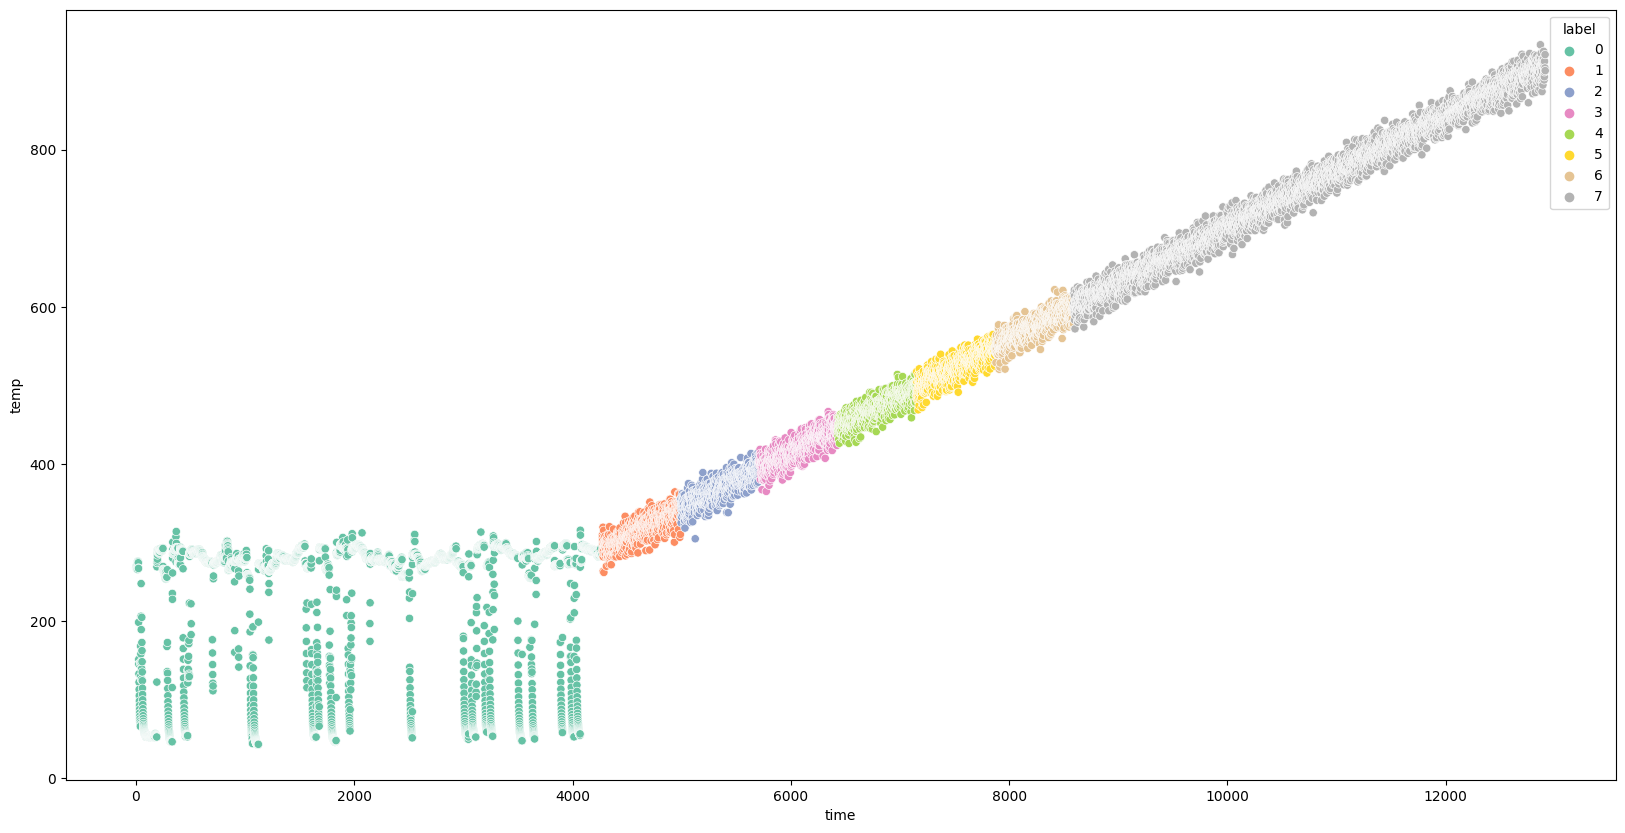

In [6]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'time', y = 'temp', data = df_train, hue = 'label', palette = 'Set2')
plt.show()

In [7]:
time_test = []
X_test = []
y_test = []

df_tmp_test = pd.concat([df_gas_mean_new_1, df_gas_mean_new_8], axis = 0)
test_len = len(df_tmp_test)
test_share, test_remainder = test_len // 60, test_len % 60


for idx in range(test_share):
    tmp = round(df_tmp_test['GAS MEAN TEMP'][idx*60:(idx+1) * 60].mean(), 2)
    time_test.append(idx+1)
    random_sector = np.random.randint(1,7) # 몇 번째 구간
    random_day = np.random.randint(30) # 그 간중 몇일
    random_hour = np.random.randint(24) # 그 중 몇 시간
    tmp_data = np.mean(linear_function_1H(tmp, N = 6, sector = random_sector, day = random_day, hour = random_hour))
    X_test.append(tmp_data)
    y_test.append(random_sector)

df_test = pd.DataFrame({
    'time' : time_test,
    'temp' : X_test,
    'label' : y_test
})
df_test

,time,temp,label
0,1,489.690000,3
1,2,437.778571,2
2,3,639.780000,6
3,4,382.732857,1
4,5,622.007143,6
...,...,...,...
738,739,528.580000,4
739,740,480.694286,3
740,741,346.597143,1
741,742,363.704286,1


In [8]:
X_train = df_train['temp']
y_train = df_train['label']
X_test = df_test['temp']
y_test = df_test['label']

Data : X_train, y_train, X_test, y_test

기울기 : [[0.01242934]], y절편 : [-2.46103429]


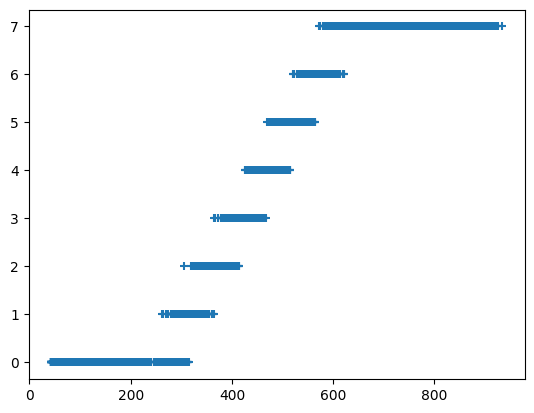

In [9]:
from sklearn.linear_model import LinearRegression

model_lir = LinearRegression()
model_lir.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
lir_predict = model_lir.predict(X_train.values.reshape(-1,1))

print("기울기 : {}, y절편 : {}".format(model_lir.coef_, model_lir.intercept_))


plt.scatter(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1), marker = '+')
#plt.scatter(X_train.values.reshape(-1,1), lir_predict, marker = 'o')
#plt.legend(['temp distribution','Linear Regression'])

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
y_pred = dt.predict(X_test.values.reshape(-1,1))
print(accuracy_score(y_test.values.reshape(-1,1), y_pred))


0.18438761776581428


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC

log_model = LogisticRegression()
rnd_model = RandomForestClassifier()
svm_model = SVC()

voting_model = VotingClassifier(
    estimators=[('lr',log_model),('rf',rnd_model),('svc',svm_model)], # 3개의 약한 학습기
    voting='hard' # 직접 투표(hard voting)
)
voting_model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

for model in (log_model,rnd_model,svm_model,voting_model):
  model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
  y_pred = model.predict(X_test.values.reshape(-1,1))
  print(model.__class__.__name__," : ",accuracy_score(y_test,y_pred))

LogisticRegression  :  0.1641991924629879
RandomForestClassifier  :  0.18438761776581428
SVC  :  0.1816958277254374
VotingClassifier  :  0.1655450874831763


In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 모델 구축
# BaggingClassifier에서 사용한 분류기가 클래스 확률추정(predict_proba)이 가능하면 자동으로 간접 투표 사용 
bag_model = BaggingClassifier(
    DecisionTreeClassifier(), # 약한 학습기(결정 트리)
    n_estimators=1000, # 약한 학습기(결정 트리) 500개 생성
    max_samples=0.05, # 0.0~1.0 사이 실수 선택(실수 x 샘플 수) 혹은 샘플수 지정
    bootstrap=True, # True : 배깅, False : 페이스팅
    n_jobs=-1 # 훈련과 예측에 사용할 CPU 코어 수 (-1 : 가용한 모든 코어 사용)
)

# 모델 학습
bag_model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

# 모델 예측
y_pred = bag_model.predict(X_test.values.reshape(-1,1))

# 모델 평가
print(bag_model.__class__.__name__," : ",accuracy_score(y_test.values.reshape(-1,1),y_pred))

BaggingClassifier  :  0.17900403768506057


### 일별로 데이터가 몇개 있는지 Count

#### 00시 ~ 24시 : 24 * 60 = 1440 
#### 09시 ~ 24시 : 15 * 60 = 900

In [13]:
df_gas_count_dict = { 1: [],
                2: [],
                3: [],
                4: [],
                5 : [],
                6 : [],
                7 : [],
                8 : []}
for idx in range(1,9):
    df_gas_count = globals()['df_gas_mean_new_' + str(idx)].loc[:,'date'].value_counts(sort = False)
    for j in range(1,len(df_gas_count)+1):
        df_gas_count_dict[idx].append(df_gas_count.iloc[j-1])

print(df_gas_count_dict)

{1: [900, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1439, 1440, 1440, 1440, 1440, 1438, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440], 2: [1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440], 3: [1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1439, 1439, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440], 4: [1440, 1440, 1440, 1440, 1440, 1440, 1438, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440], 5: [1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1438, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440], 6: [1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1438,

#### window size : 1시간 으로 slicing -> 간격 : 60, overlap : 10

share, remainder :  672 0
mean_temp length :  672


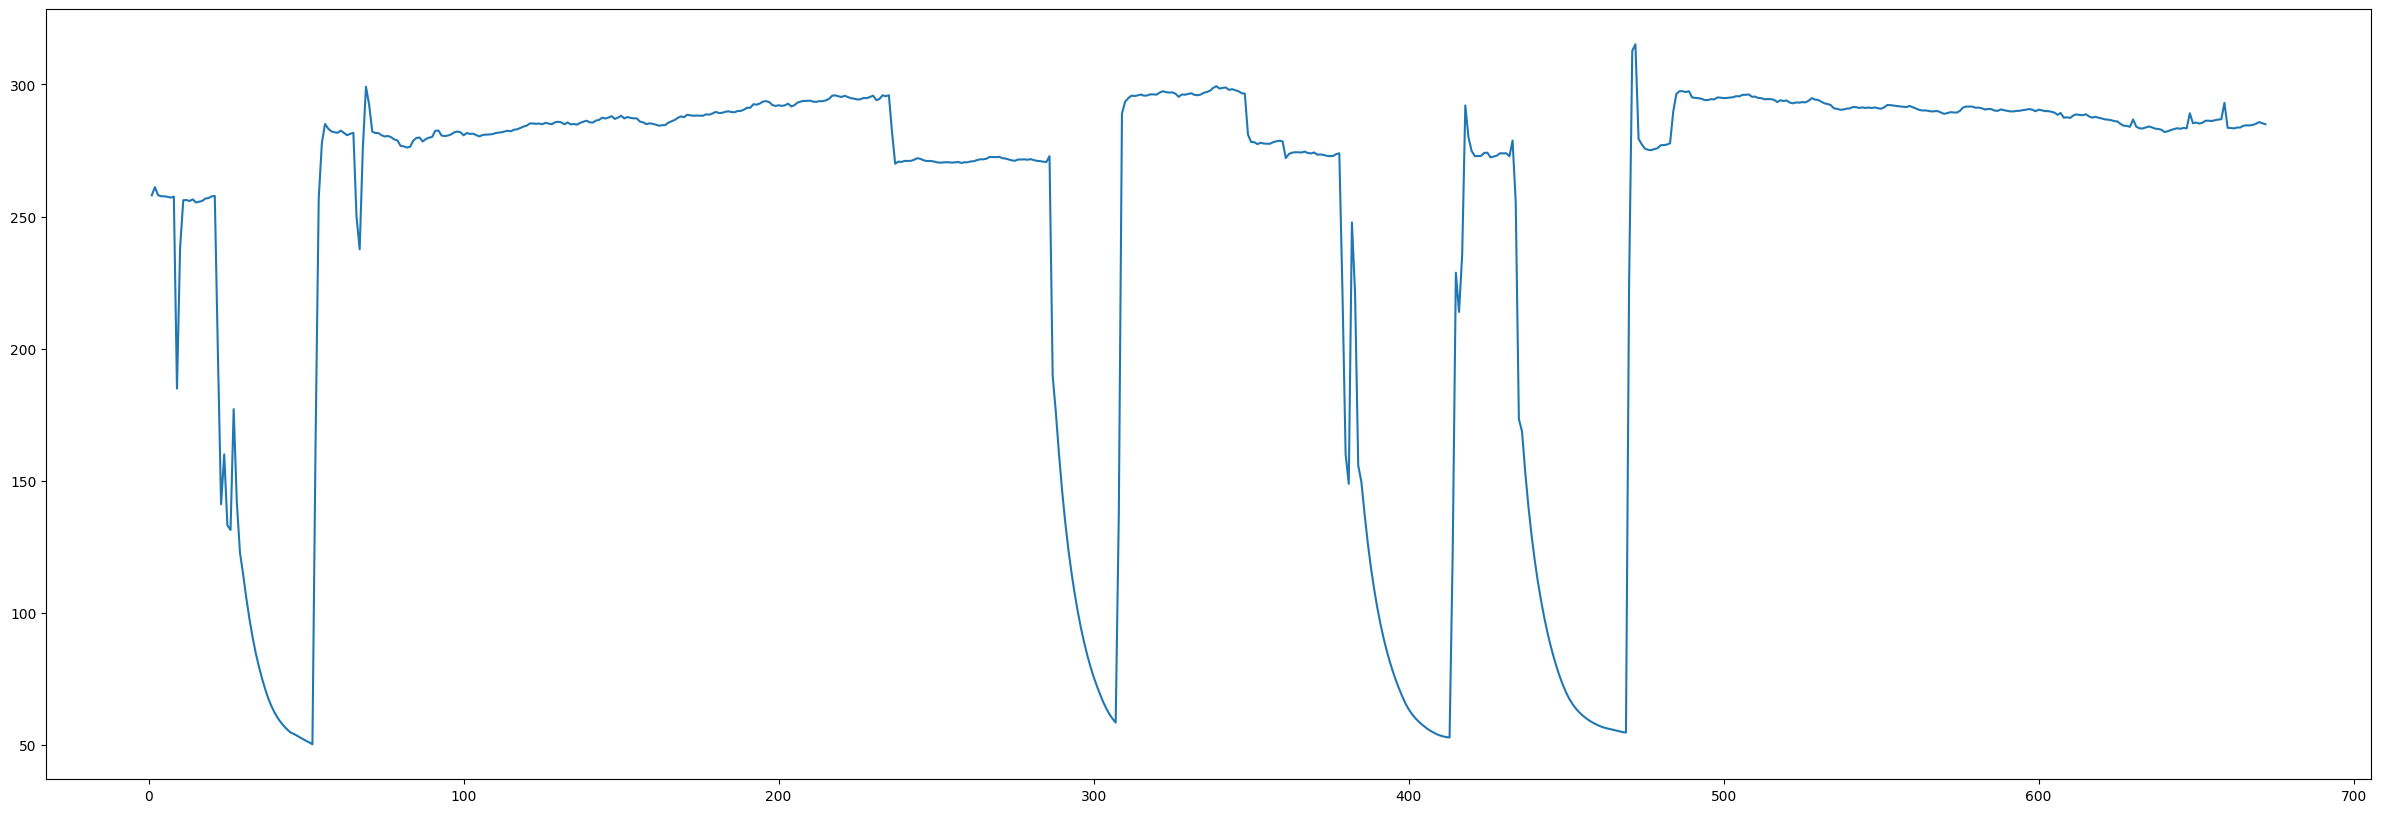

In [14]:
mean_temp = []
#hyper parameter
DATA = df_gas_mean_new_7
LEN = len(DATA['GAS MEAN TEMP'])

# 몫과 나머지 구하기
share, remainder = (LEN // 60), (LEN % 60)
print("share, remainder : ", share, remainder)

for i in range(share):
    mean = round(DATA['GAS MEAN TEMP'][(i)*60:(i+1)*60].mean(),2) # (0,60),(60,120)
    mean_temp.append(mean)

if remainder != 0:
    mean_temp.append(DATA['GAS MEAN TEMP'][share * 60:].mean())

print("mean_temp length : ", len(mean_temp))

plt.figure(figsize = (30,10))
x = np.arange(1,len(mean_temp)+1)
sns.lineplot(x = x, y = mean_temp)
plt.show()

#### 2월부터 7월까지 1시간 단위로 자른 평균 데이터 - 구간 0 (정상)

In [15]:
MEAN_TEMP_2_to_7 = []
MEAN_TEMP_2_to_7_label = []
for i in range(2,8):
    dataset = globals()['df_gas_mean_new_{}'.format(i)]
    LEN = len(dataset['GAS MEAN TEMP'])
    share, remainder = LEN // 60, LEN % 60

    for i in range(share):
        MEAN_TEMP_2_to_7.append(round(dataset['GAS MEAN TEMP'][(i)*60:(i+1)*60].mean(), 2))
        MEAN_TEMP_2_to_7_label.append(0)
    if remainder != 0:
        MEAN_TEMP_2_to_7.append(round(dataset['GAS MEAN TEMP'][share * 60:].mean(),2))
        MEAN_TEMP_2_to_7_label.append(0)
print(np.mean(MEAN_TEMP_2_to_7), np.std(MEAN_TEMP_2_to_7), len(MEAN_TEMP_2_to_7), len(MEAN_TEMP_2_to_7_label))


239.72498595505618 82.41515430848148 4272 4272


#### 모의 함수 정의

In [16]:
def linear_function(data,N,sector): # y = ax + 240
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    """
    # calculate gradient (a)
    a = 360 / (N+1)
    return data + a * sector
#print(linear_function(L,sector = 1))


#### 모의를 위한 random 데이터 추출

#### window size를 1시간마다 잘라서 ( window_size : 24 ) 모의구간에서의 데이터 형태가 하나의 직선 형태이게끔 함수 코드 다시

239.72498595505618 82.41515430848148 4272 4272


Text(0.5, 0, '')

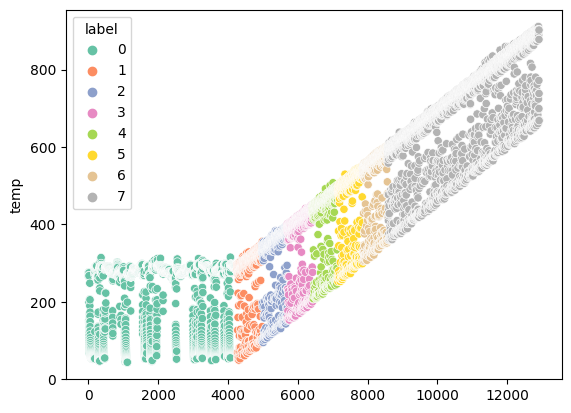

In [73]:
MEAN_TEMP_2_to_7 = []
MEAN_TEMP_2_to_7_label = []
for i in range(2,8):
    dataset = globals()['df_gas_mean_new_{}'.format(i)]
    LEN = len(dataset['GAS MEAN TEMP'])
    share, remainder = LEN // 60, LEN % 60

    for i in range(share):
        MEAN_TEMP_2_to_7.append(round(dataset['GAS MEAN TEMP'][(i)*60:(i+1)*60].mean(), 2))
        MEAN_TEMP_2_to_7_label.append(0)
    if remainder != 0:
        MEAN_TEMP_2_to_7.append(round(dataset['GAS MEAN TEMP'][share * 60:].mean(),2))
        MEAN_TEMP_2_to_7_label.append(0)
print(np.mean(MEAN_TEMP_2_to_7), np.std(MEAN_TEMP_2_to_7), len(MEAN_TEMP_2_to_7), len(MEAN_TEMP_2_to_7_label))


def linear_function(data,N,sector): # y = ax + 240
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    """
    # calculate gradient (a)
    a = 360 / (N+1)
    return data + a * sector - a
#print(linear_function(L,sector = 1))


def linear_function_24(data,N,sector,idx): # y = ax + 240
    """
    data : np.array gas temperature data
    N : 몇개의 구간으로 나눌 것인지
    sector : 몇번째 구간의 data인지
    idx : 특정 구간에서 몇 번째 데이터인지
    """
    # calculate gradient (a)
    a = 360 / (N+1) # 전체 데이터에 대한 증가율 : 52
    a_tmp = a / 30 # 각 섹터에 대한 증가율 : 1.7
    return data + a * sector + a_tmp * idx - a 

discuss_data = []
label = []

# 모의 구간을 6등분 : 6달
# 한달마다 증가율이 동일하도록 설정
# 한달(구간 하나)에 포함되는 데이터 개수 : 30day * 24hours = 720개
# 각 구간마다 데이터의 개수 : 
for i in range(6):
	random_temp = np.random.choice(MEAN_TEMP_2_to_7, 720)
	for j in range(30):
		tmp = np.random.choice(random_temp, 24) # 하루치 데이터
		data_temp = linear_function_24(tmp, N = 6, sector = i+1, idx = j )
		label_tmp = [i+1] * 24
		np.random.shuffle(data_temp)
		discuss_data.extend(data_temp)
		label.extend(label_tmp)
	

for i in range(6):
	random_temp = np.random.choice(MEAN_TEMP_2_to_7, 720)
	for j in range(30):
		tmp = np.random.choice(random_temp, 24)
		data_temp = linear_function_24(tmp, N = 6, sector = i + 7, idx = j)
		label_tmp = [7] * 24
		np.random.shuffle(data_temp)
		discuss_data.extend(data_temp)
		label.extend(label_tmp)



df = pd.DataFrame({
    'time' : np.arange(1,12913),
    'temp' : np.concatenate([MEAN_TEMP_2_to_7, discuss_data], axis = 0),
    'label' : np.concatenate([MEAN_TEMP_2_to_7_label, label], axis = 0)
})

MEAN_TEMP_2_to_7.extend(discuss_data)

sns.scatterplot(x = 'time', y = 'temp', hue = 'label', data = df, palette = 'Set2')
plt.xlabel('')

## Test DataSet

In [74]:
MEAN_TEMP_1_8 = []
MEAN_TEMP_1_8_label = []

for i in range(1,9,7):
    dataset = globals()['df_gas_mean_new_{}'.format(i)]
    LEN = len(dataset['GAS MEAN TEMP'])
    share, remainder = LEN // 60, LEN % 60

    for i in range(share):
        MEAN_TEMP_1_8.append(round(dataset['GAS MEAN TEMP'][(i)*60:(i+1)*60].mean(), 2))
        MEAN_TEMP_1_8_label.append(0)
    if remainder != 0:
        MEAN_TEMP_1_8.append(round(dataset['GAS MEAN TEMP'][share * 60:].mean(),2))
        MEAN_TEMP_1_8_label.append(0)

print("LENGTH : ", len(MEAN_TEMP_1_8), len(MEAN_TEMP_1_8_label))
MEAN_TEMP_1_8 = np.array(MEAN_TEMP_1_8)
MEAN_TEMP_1_8 -= 22
print(np.mean(MEAN_TEMP_1_8), np.std(MEAN_TEMP_1_8), len(MEAN_TEMP_1_8), len(MEAN_TEMP_1_8_label))

X_test = []
y_test = []
X_test_mean = []
y_test_mean = []


for i in range(31):
    tmp = np.random.choice(MEAN_TEMP_1_8, 24) # [0:24], [24:48]
    random_sector = np.random.randint(1,7) # 몇 번째 구간
    random_idx = np.random.randint(30) # 위의 구간중 몇일
    tmp_data = linear_function_24(tmp,N = 6,sector = random_sector, idx = random_idx)
    tmp_data_mean = round(tmp_data.mean(),2)
    tmp_label = [random_sector] * 24
    
    X_test.extend(tmp_data)
    y_test.extend(tmp_label)
    X_test_mean.append(tmp_data_mean)
    y_test_mean.append(random_sector)

test_df = pd.DataFrame({
    'time' : np.arange(1,745),
    'temp' : X_test,
    'label' : y_test
})
test_mean_df = pd.DataFrame({
    'time': np.arange(1,32),
    'temp' : X_test_mean,
    'label' : y_test_mean
})

LENGTH :  744 744
240.30712365591398 60.604055136473406 744 744


<Axes: >

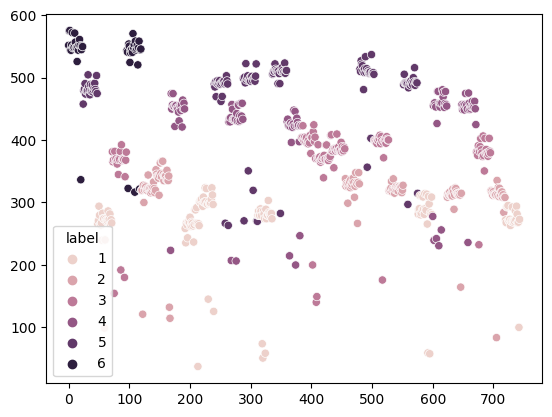

In [75]:
x = np.arange(len(X_test))

sns.scatterplot(x = x, y = X_test, hue = 'label', data = test_df)

#### 적용할 만한 알고리즘
1. 선형회귀
2. 분류
3. SVM - Support Vector Machine
3. 앙상블

    > Ensemble
    1. RandomForest
    2. Bagging
    3. AdaBoost

In [76]:
X_train = df['temp']
y_train = df['label']
X_test = test_df['temp']
y_test = test_df['label']
X_test_mean = test_mean_df['temp']
y_test_mean = test_mean_df['label']
random_state = 1996

Data : X_train, y_train, X_test, y_test, X_test_mean, y_test_mean

## 선형회귀

기울기 : [[0.01206247]], y절편 : [-1.87447775]


Text(0, 0.5, 'label')

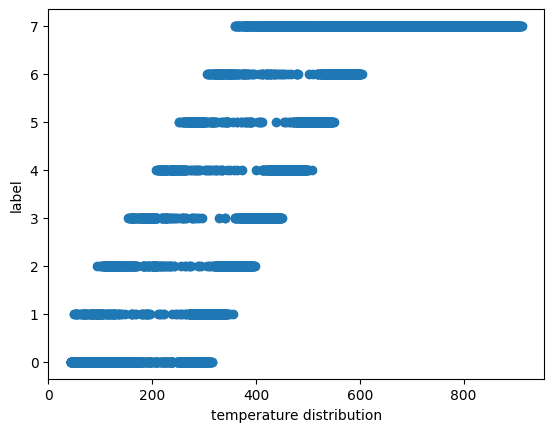

In [77]:
from sklearn.linear_model import LinearRegression

model_lir = LinearRegression()
model_lir.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
y_pred = model_lir.predict(X_train.values.reshape(-1,1))
#print(accuracy_score(y_test.values.reshape(-1,1),lir_predict))
print("기울기 : {}, y절편 : {}".format(model_lir.coef_, model_lir.intercept_))


plt.scatter(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))#, marker = '+')
plt.xlabel('temperature distribution')
plt.ylabel('label')
#plt.scatter(X_train.values.reshape(-1,1), y_pred, marker = 'o')
#plt.legend(['temp distribution','Linear Regression'])

## 분류

In [78]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = random_state)
dt.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
dt_pred = dt.predict(X_test.values.reshape(-1,1))
print(accuracy_score(y_test.values.reshape(-1,1), dt_pred))


0.3736559139784946


In [79]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
y_pred = svm_model.predict(X_test.values.reshape(-1,1))
print(accuracy_score(y_test.values.reshape(-1,1), y_pred))

0.3709677419354839


## 트리, 앙상블

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier

log_model = LogisticRegression()
rnd_model = RandomForestClassifier()

voting_model = VotingClassifier(
    estimators=[('lr',log_model),('rf',rnd_model)], # 3개의 약한 학습기
    voting='hard' # 직접 투표(hard voting)
)
voting_model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

for model in (log_model,rnd_model,voting_model):
  model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
  y_pred = model.predict(X_test.values.reshape(-1,1))
  print(model.__class__.__name__," : ",accuracy_score(y_test,y_pred))

LogisticRegression  :  0.21370967741935484
RandomForestClassifier  :  0.3736559139784946
VotingClassifier  :  0.34139784946236557


In [81]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 모델 구축
# BaggingClassifier에서 사용한 분류기가 클래스 확률추정(predict_proba)이 가능하면 자동으로 간접 투표 사용 
bag_model = BaggingClassifier(
    DecisionTreeClassifier(), # 약한 학습기(결정 트리)
    n_estimators=1000, # 약한 학습기(결정 트리) 500개 생성
    max_samples=0.05, # 0.0~1.0 사이 실수 선택(실수 x 샘플 수) 혹은 샘플수 지정
    bootstrap=True, # True : 배깅, False : 페이스팅
    n_jobs=-1 # 훈련과 예측에 사용할 CPU 코어 수 (-1 : 가용한 모든 코어 사용)
)

# 모델 학습
bag_model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

# 모델 예측
y_pred = bag_model.predict(X_test.values.reshape(-1,1))

# 모델 평가
print(bag_model.__class__.__name__," : ",accuracy_score(y_test.values.reshape(-1,1),y_pred))

BaggingClassifier  :  0.489247311827957


In [82]:
# 모델 구축
bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    bootstrap = True,
    n_jobs = -1,
    oob_score = True # oob평가를 위해 True를 지정한다.
)

# 모델 학습
bag_model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

# 모델 평가(oob_score_)
print('oob_score : ',bag_model.oob_score_)

# 모델 평가
y_pred = bag_model.predict(X_test.values.reshape(-1,1))
print('test_score : ',accuracy_score(y_test.values.reshape(-1,1),y_pred))

oob_score :  0.7604553903345725
test_score :  0.3763440860215054


In [83]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 모델 구축
rnd_model = RandomForestClassifier(
    n_estimators = 500, # 예측기 500개
    max_leaf_nodes = 16, # 자식노드의 최대 개수 
    n_jobs = -1 # CPU 코어 구동 개수
)

# 모델 학습
rnd_model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))


# 모델 예측
y_pred_rf = rnd_model.predict(X_test.values.reshape(-1,1))

# 모델 평가
print("rnd_model : ",accuracy_score(y_pred_rf,y_test.values.reshape(-1,1)))

rnd_model :  0.47446236559139787


In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# 아다부스트 모델 구축
# 아다부스트의 학습기 : Decision Tree (max_depth =1) 사용
# 학습기 개수(n_estimators) : 200개
# SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function) 알고리즘 사용
# 기본 학습기가 확률 추정(predict_proba)이 가능하면 SAMME.R 사용 -> 일반적으로 성능이 더 좋음
ada_model = AdaBoostClassifier(n_estimators=30, 
                        random_state=10, 
                        learning_rate=0.1)

# 모델 학습
ada_model.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
ada_pred = ada_model.predict(X_test.values.reshape(-1,1))
print("Adaboost Accuracy : {:.4f}".format(accuracy_score(y_test.values.reshape(-1,1), ada_pred)))

Adaboost Accuracy : 0.0847


In [85]:
# for i in range(8):
#     pivot_data = pd.read_csv('./csv파일/2451_general_pivot_{}.csv'.format(i+1), encoding = 'cp949')
#     pkg_data = pd.read_csv('./csv파일/2451_general_pkg_list_{}.CSV'.format(i+1), encoding = 'cp949')
#     pivot_df = pd.DataFrame(pivot_data)
#     pkg_df = pd.DataFrame(pkg_data) 
#     one = pivot_df.loc[:, 'ds_date'].value_counts(sort=False)
#     two = pkg_df.loc[:, 'ds_date'].value_counts(sort=False)
#     result = pd.concat([one, two], axis =1 )
#     print(result)

In [86]:
# for i in range(8):
#     pivot_data = pd.read_csv('./csv파일/2451_general_pivot_{}.csv'.format(i+1), encoding = 'cp949')
    
#     pivot_df = pd.DataFrame(pivot_data)

#     one = pivot_df.loc[:, 'ds_date'].value_counts(sort=False)

#     print(one)

In [87]:
# for i in range(8):
#     pivot_data = pd.read_csv('./csv파일/2451_general_pkg_list_{}.csv'.format(i+1), encoding = 'cp949')
#     pkg_data = pd.read_csv('./한화오션_예지보전_데이터/2451_general_pkg_list_{}.csv'.format(i+1), encoding = 'cp949')
#     pivot_df = pd.DataFrame(pivot_data)
#     pkg_df = pd.DataFrame(pkg_data)
#     one = pivot_df.loc[:, 'ds_date'].value_counts(sort=False)
#     two = pkg_df.loc[:, 'ds_date'].value_counts(sort=False)
#     result = pd.concat([one, two], axis =1 )
#     print(result)

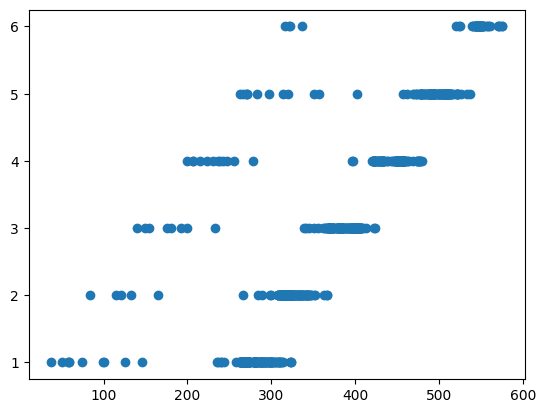

In [88]:

plt.scatter(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

# Test

MEAN_TEMP_{} : raw data에서 temperature 데이터를 1시간마다 평균낸 데이터

In [89]:
MEAN_TEMP_1_8 = []
MEAN_TEMP_1_8_label = []

for i in range(1,9,7):
    dataset = globals()['df_gas_mean_new_{}'.format(i)]
    LEN = len(dataset['GAS MEAN TEMP'])
    share, remainder = LEN // 60, LEN % 60

    for i in range(share):
        MEAN_TEMP_1_8.append(round(dataset['GAS MEAN TEMP'][(i)*60:(i+1)*60].mean(), 2))
        MEAN_TEMP_1_8_label.append(0)
    if remainder != 0:
        MEAN_TEMP_1_8.append(round(dataset['GAS MEAN TEMP'][share * 60:].mean(),2))
        MEAN_TEMP_1_8_label.append(0)

print("LENGTH : ", len(MEAN_TEMP_1_8), len(MEAN_TEMP_1_8_label))
MEAN_TEMP_1_8 = np.array(MEAN_TEMP_1_8)
MEAN_TEMP_1_8 -= 22
print(np.mean(MEAN_TEMP_1_8), np.std(MEAN_TEMP_1_8), len(MEAN_TEMP_1_8), len(MEAN_TEMP_1_8_label))

test_data = []
test_label = []
test_mean_data = []
test_mean_label = []


for i in range(31):
    tmp = np.random.choice(MEAN_TEMP_1_8, 24) # [0:24], [24:48]
    random_sector = np.random.randint(1,7) # 몇 번째 구간
    random_idx = np.random.randint(30) # 그 간중 몇일
    tmp_data = linear_function_24(tmp,N = 6,sector = random_sector, idx = random_idx)
    tmp_data_mean = round(tmp_data.mean(),2)
    tmp_label = [random_sector] * 24
    
    test_data.extend(tmp_data)
    test_label.extend(tmp_label)
    test_mean_data.append(tmp_data_mean)
    test_mean_label.append(random_sector)

print(len(test_data), len(test_label), len(test_mean_data), len(test_mean_label))

test_df = pd.DataFrame({
    'time' : np.arange(1,745),
    'temp' : test_data,
    'label' : test_label
})
test_df['label'].unique()

LENGTH :  744 744
240.30712365591398 60.604055136473406 744 744
744 744 31 31


array([4, 5, 2, 6, 1, 3], dtype=int64)

MEAN_TEMP_1_8 이 설명하는 데이터는 1월과 8월의 데이터를 1시간마다 자른 데이터의 평균이 들어있다.
TEST 를 하려면 모든 데이터에서 하루치 데이터를 뽑아서 (그대로 and 평균값)을 구해서 적용 후 비교.

In [90]:
test_df = pd.DataFrame({
    'time' : np.arange(1,745),
    'temp' : test_data,
    'label' : test_label
})
test_df['label'].unique()

array([4, 5, 2, 6, 1, 3], dtype=int64)

In [91]:
print(model_lir.predict([[test_mean_data[2]]]), test_mean_label[0])

[[1.76947342]] 4
